# ISHANT KUNDRA

# PART A 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder

from IPython.core.display import HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
import pickle

In [2]:
df_01=pd.read_csv("Desktop/data/TelcomCustomer-Churn_1.csv")

In [3]:
df_02=pd.read_csv("Desktop/data/TelcomCustomer-Churn_2.csv")

In [4]:
df_01.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
df_01.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes


In [6]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [7]:
df_02.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_02.tail()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [10]:
df_merge=pd.merge(df_01, df_02, on='customerID')
df_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
A = df_02.columns.intersection(df_01.columns)
print(A)

Index(['customerID'], dtype='object')


In [12]:
df_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [15]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [16]:
df_merge['TotalCharges'].isnull().sum()

df_merge = df_merge[df_merge['TotalCharges'].notna()]

df_merge.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
print(df_merge['TotalCharges'].dtypes)
print(df_merge['MonthlyCharges'].dtypes)

object
float64


In [18]:
df_merge['TotalCharges'] = pd.to_numeric(df_merge['TotalCharges'],errors = 'coerce')
print(df_merge['TotalCharges'].dtypes)

float64


In [19]:
print(df_merge['TotalCharges'].dtypes)
print(df_merge['MonthlyCharges'].dtypes)

float64
float64


In [20]:
df_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
print(df_merge['gender'].unique())
print(df_merge['SeniorCitizen'].unique())
print(df_merge['Partner'].unique())
print(df_merge['Dependents'].unique())
"""print(df_merge['tenure'].unique())"""
print(df_merge['PhoneService'].unique())
print(df_merge['MultipleLines'].unique())
print(df_merge['InternetService'].unique())
print(df_merge['OnlineSecurity'].unique())
print(df_merge['DeviceProtection'].unique())
print(df_merge['TechSupport'].unique())
print(df_merge['StreamingTV'].unique())
print(df_merge['StreamingMovies'].unique())
print(df_merge['Contract'].unique())
print(df_merge['PaperlessBilling'].unique())
print(df_merge['PaymentMethod'].unique())
print(df_merge['Churn'].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [22]:
df_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df_merge[['gender','Partner','Dependents','PhoneService','MultipleLines','Churn','PaperlessBilling','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','Contract','InternetService','PaymentMethod']] = df_merge[['gender','Partner','Dependents','PhoneService','MultipleLines','Churn','PaperlessBilling','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','Contract','InternetService','PaymentMethod']].apply(LabelEncoder().fit_transform)

df_merge.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
df_merge.drop(["customerID"], axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [25]:
y = df_merge[['Churn']].copy()


X=df_merge.drop(['Churn','customerID'], axis=1)

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   int64  
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   int64  
 3   Dependents        5634 non-null   int64  
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   int64  
 6   MultipleLines     5634 non-null   int64  
 7   InternetService   5634 non-null   int64  
 8   OnlineSecurity    5634 non-null   int64  
 9   OnlineBackup      5634 non-null   int64  
 10  DeviceProtection  5634 non-null   int64  
 11  TechSupport       5634 non-null   int64  
 12  StreamingTV       5634 non-null   int64  
 13  StreamingMovies   5634 non-null   int64  
 14  Contract          5634 non-null   int64  
 15  PaperlessBilling  5634 non-null   int64  
 16  PaymentMethod     5634 non-null   int64 

In [27]:
# apply normalization techniques
for column in X_train.columns:
    X_train[column] = (X_train[column] - X_train[column].min()) / (X_train[column].max() - X_train[column].min())    
  
# view normalized data
print(X_train.sample(5))


for column in X_test.columns:
    X_test[column] = (X_test[column] - X_test[column].min()) / (X_test[column].max() - X_test[column].min())    
  
# view normalized data
print(X_test.sample(5))


for column in y_train.columns:
    y_train[column] = (y_train[column] - y_train[column].min()) / (y_train[column].max() - y_train[column].min())    
  
# view normalized data
print(y_train.sample(5))


for column in y_test.columns:
    y_test[column] = (y_test[column] - y_test[column].min()) / (y_test[column].max() - y_test[column].min())    
  
# view normalized data
print(y_test.sample(5))

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
2739     0.0            0.0      1.0         0.0  0.847222           1.0   
4579     1.0            0.0      0.0         0.0  0.430556           1.0   
963      0.0            1.0      0.0         0.0  0.777778           1.0   
5114     0.0            1.0      0.0         0.0  0.694444           1.0   
4142     0.0            0.0      0.0         0.0  0.930556           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2739            1.0              0.5             0.0           0.0   
4579            1.0              0.5             0.0           1.0   
963             1.0              0.0             1.0           0.0   
5114            1.0              0.5             1.0           1.0   
4142            0.0              0.0             1.0           1.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
2739               0.0          1.0        

In [28]:
X_train.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3596,0.0,0.0,0.0,0.0,0.041667,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.369706,0.016894
3906,0.0,0.0,1.0,0.0,0.013889,1.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.603388,0.006924
2980,0.0,0.0,0.0,0.0,1.000000,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.0,0.333333,0.071749,0.213207
1338,1.0,0.0,0.0,0.0,0.013889,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,1.000000,0.018934,0.000156
6387,0.0,0.0,1.0,0.0,0.486111,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.384654,0.212589


In [29]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08,min_child_weight=1, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.84
Accuracy of XGB classifier on test set: 0.81


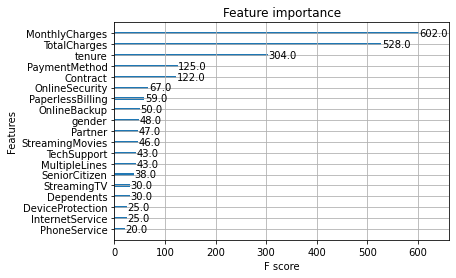

In [30]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [31]:
xgb_model = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.99
Accuracy of XGB classifier on test set: 0.78


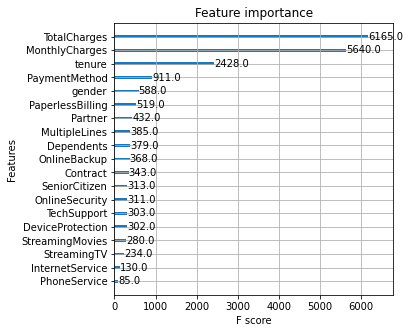

In [32]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# PART B

In [33]:
def data_value(path_to_csv,target_feature):
    df1 = pd.read_csv("Desktop/data/TelcomCustomer-Churn_1.csv")
    
    pre_values = df1.isna().sum()
    pre_list = ((pre_values>0).index).tolist()
    for i in pre_list:
        if df1[i].dtypes in ['int64','int32','float64','float32']:
            df1[i].fillna(df1[i].mean(),inplace=True)
        else: 
            df1[i].fillna(mode (df1[i])[0][0],inplace=True)
              
    df1.drop_duplicates(inplace=True)
    
    for col in df1.columns:
        unique_percent = (df1[col].value_counts().count()/df1.shape[0])*100
        if unique_percent > 95:
            df1.drop(col,inplace=True,axis=1)
        else:
            pass       
    
    return df1,target_feature

In [34]:
def training_models(preprocessed_df, target_feature):

    le = LabelEncoder()
    model_lst = []
    train_acc_lst = []
    test_acc_lst = []
    test_precision_lst = []
    test_recall_lst = []
        
    for col in preprocessed_df.columns:
        if preprocessed_df[col].dtype == 'O':
            preprocessed_df[col] = le.fit_transform(preprocessed_df[col])
        else:
            pass
    
    X = preprocessed_df.drop(target_feature,axis=1)
    y = preprocessed_df[target_feature]
    
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)
    
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    xgb = XGBClassifier()
    ada = AdaBoostClassifier()
    model_list = [lr, dt, ada, xgb]
    
    for idx,i in enumerate(model_list):
        i.fit(x_train,y_train)
        train_pred= i.predict(x_train)
        test_pred = i.predict(x_test)

        train_acc = accuracy_score(y_train,train_pred)
        test_acc = accuracy_score(y_test,test_pred)
        test_precision = precision_score(y_test,test_pred,average='weighted')
        test_recall = recall_score(y_test,test_pred,average='weighted')

        model_lst.append(i)
        train_acc_lst.append(train_acc)
        test_acc_lst.append(test_acc)
        test_precision_lst.append(test_precision)
        test_recall_lst.append(test_recall)
        col_names = ['Model','Train_accuracy','Test_acc','Test_precision','Test_recall']
        model_performance = pd.DataFrame(list(zip(model_lst,train_acc_lst,test_acc_lst,test_precision_lst,test_recall_lst)),columns=col_names)
        
    return model_performance,x_train,y_train

In [35]:
def practice_model(model_performance,x_train,y_train,file_name):
    best_model = model_performance[model_performance['Train_accuracy']==max(model_performance['Train_accuracy'])]['Model'].iloc[0]
    best_model.fit(x_train,y_train)
    with open(file_name, 'wb') as handle:
        pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
def main_fn(path_to_csv,target_feature):
    preprocessed_df,target_feature = data_value(path_to_csv,target_feature)
    model_df,x_train,y_train = training_models(preprocessed_df, target_feature)
    practice_model(model_df,x_train,y_train,'model.pkl')
    return model_df

In [37]:
result_df = main_fn('TelcomCustomer-Churn_1.csv','OnlineSecurity')

In [38]:
result_df

,Model,Train_accuracy,Test_acc,Test_precision,Test_recall
0,LogisticRegression(),0.780440,0.775018,0.768617,0.775018
1,DecisionTreeClassifier(),0.890131,0.727466,0.721188,0.727466
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.783103,0.782825,0.777116,0.782825
3,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.851083,0.751597,0.744722,0.751597
